In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 22)
fc, pc, tc = data_instance.create_dataset(50, 2, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model.set_device(device)

In [6]:
model.set_test_data(tc)

In [7]:
model.train_with_mapping(num_epochs=20, batch_size=20, learning_rate=0.001)

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\dklsuq.py:184: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean.T @ torch.linalg.inv(posterior_var) @ posterior_mean)


Epoch:0, Loss: 0.01458063004538417
Epoch:1, Loss: 0.01156234374269843
Epoch:2, Loss: 0.009737712109461427
Epoch:3, Loss: 0.00933211050219834
Epoch:4, Loss: 0.008964095470011235
Epoch:5, Loss: 0.008642919542357326
Epoch:6, Loss: 0.00866858068743646
Epoch:7, Loss: 0.008617170553434491
Epoch:8, Loss: 0.008603377114564896
Epoch:9, Loss: 0.00853169943868234
Epoch:10, Loss: 0.00843108883446279
Epoch:11, Loss: 0.008455584748354204
Epoch:12, Loss: 0.008386031070851613
Epoch:13, Loss: 0.008314764648328886
Epoch:14, Loss: 0.008405421592225763
Epoch:15, Loss: 0.008457143132002182
Epoch:16, Loss: 0.00844411548085233
Epoch:17, Loss: 0.008350770353987258
Epoch:18, Loss: 0.008307288753184565
Epoch:19, Loss: 0.00822039272232709


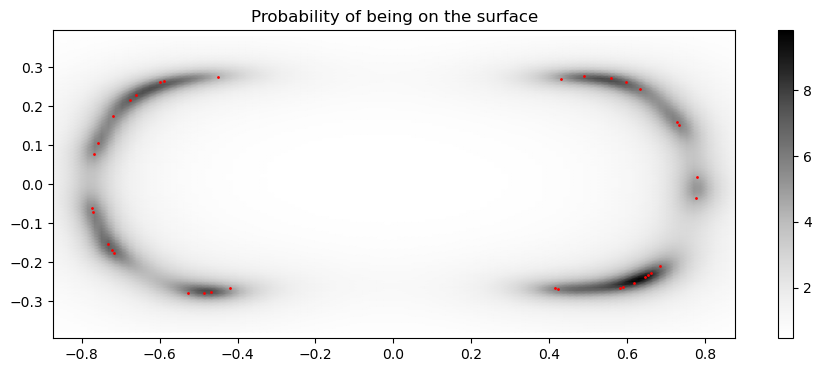

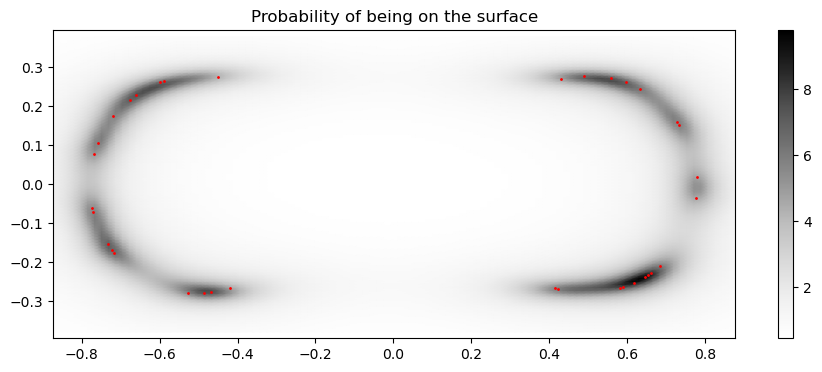

In [8]:
model.predict(do_mapping=True)

In [9]:
model.set_test_data(pc[2:4, :])

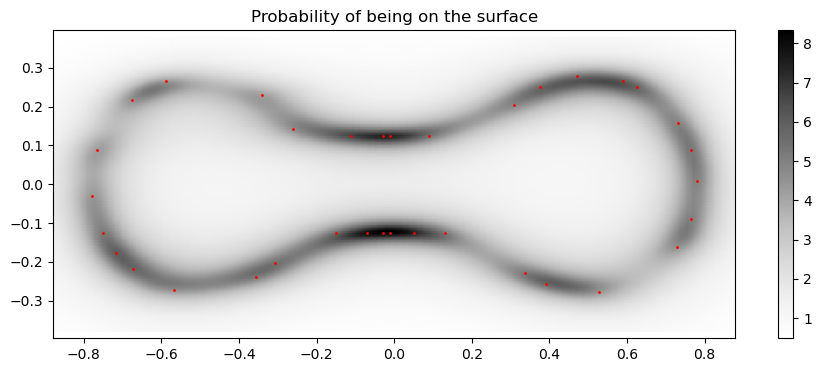

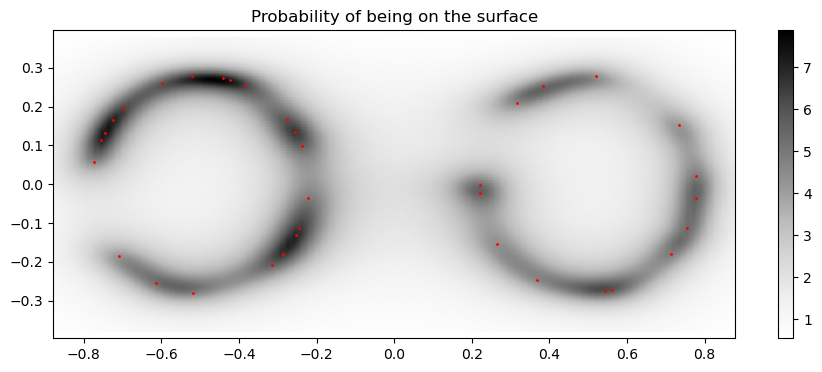

In [10]:
model.predict(do_mapping=True)

In [11]:
model_enc = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [12]:
model_enc.train_with_mapping_encoding(num_epochs=20, batch_size=20, learning_rate=0.001)

Epoch:0, Loss: 0.011933337338268757
Epoch:1, Loss: 0.010592554258182644
Epoch:2, Loss: 0.008612672524526716
Epoch:3, Loss: 0.007509390047006309
Epoch:4, Loss: 0.006542675973139703
Epoch:5, Loss: 0.006309885803282261
Epoch:6, Loss: 0.006162232121759653
Epoch:7, Loss: 0.00620867013620764
Epoch:8, Loss: 0.006038091177431107
Epoch:9, Loss: 0.005726589455145073
Epoch:10, Loss: 0.005652880804960921
Epoch:11, Loss: 0.005553901111031571
Epoch:12, Loss: 0.005440170813216766
Epoch:13, Loss: 0.005427091742279927
Epoch:14, Loss: 0.005350382278928717
Epoch:15, Loss: 0.005345621235160939
Epoch:16, Loss: 0.005427321646447264
Epoch:17, Loss: 0.005409375903027312
Epoch:18, Loss: 0.00531523314282637
Epoch:19, Loss: 0.0053522922573170885


In [13]:
model_enc.set_test_data(tc)

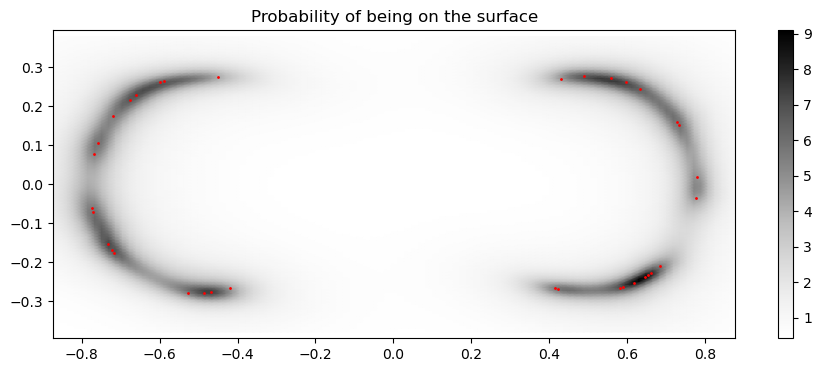

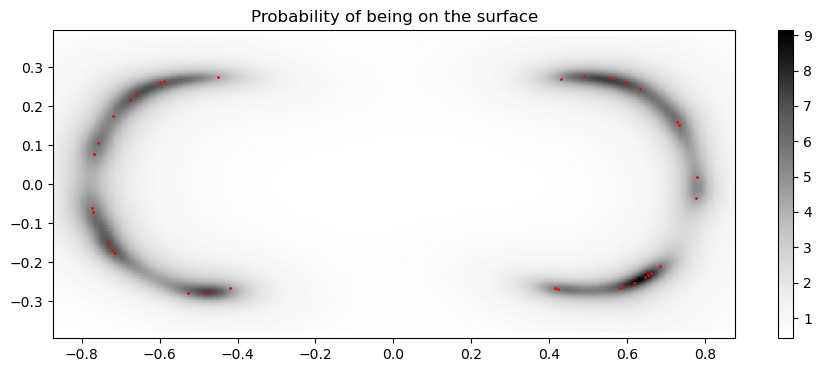

In [14]:
model_enc.predict(do_mapping=True, encoding_only=True)

In [15]:
model_enc.set_test_data(pc[2:4, :])

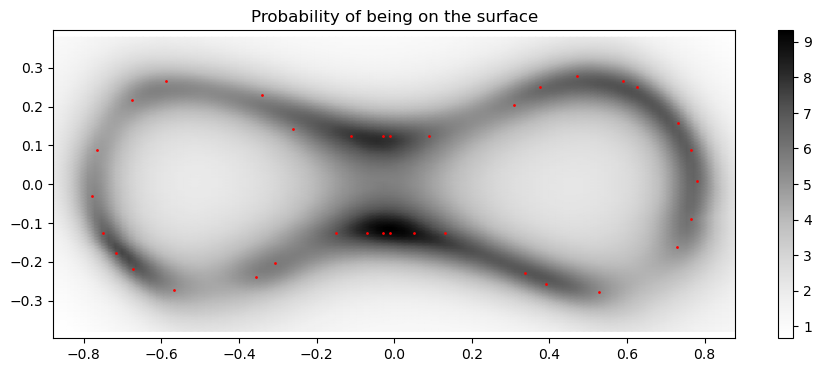

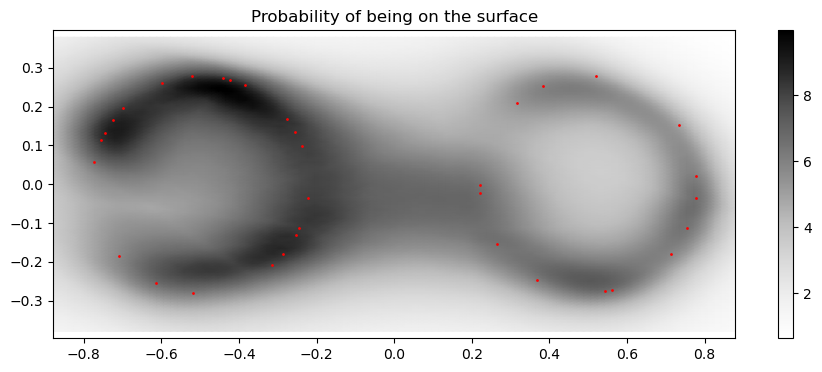

In [16]:
model_enc.predict(do_mapping=True, encoding_only=True)